# Customer Purchase Behavior Analysis in a Supermarket and Identification of Opportunities to Increase Sales

The supermarket aims to better understand customer behavior and the factors influencing sales to increase profits and improve the shopping experience. The project’s goal is to identify key trends in customer behavior, segment customers for better personalization of offers, and determine the most profitable products and marketing strategies. The results of the analysis will help optimize sales and loyalty strategies, improve customer service, and better manage the product assortment.

1.What are the sales trends depending on the location?

Which supermarket branches (in different cities or locations) generate the highest revenue?

Are there noticeable differences in product category popularity based on location?


2.How do customer behaviors differ between members ("Member") and regular customers ("Normal")?

Do members spend more on single purchases than regular customers?

Are there differences in preferred payment methods between these groups?


3.How does the gender of customers influence their purchasing preferences?

Which product categories are more popular among women, and which among men?

How does the average basket value differ between genders?


4.What are the peak sales hours?

During which hours of the day is sales volume the highest?

Do certain hours have a bigger impact on sales in specific product categories?


5.Which product categories generate the highest margins?

Which products have the highest profit margins (gross income) relative to costs?

How does sales in different categories affect overall profitability?


6.Which payment methods are most commonly used by customers?

Do payment preferences differ based on location, gender, or customer type?

How do payment methods influence the transaction value?


7.What factors influence customer ratings?

Is there a relationship between purchase value or chosen products and the ratings given by customers?

How do location and payment methods impact customer satisfaction?


8.How can sales be increased through offer personalization?

Do specific customer segments (e.g., members, female customers) respond better to promotions or certain products?

What marketing actions could attract more customers to less popular product categories?

# Setup

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
data = pd.read_csv("SuperMarket Analysis.csv")

In [7]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


# Preparing data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
print(data.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Sales                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


# Main part of the project 

# Task 1 

# Comparison of revenues generated by different supermarket branches in different locations.

In [11]:
revenue_by_branch = data.groupby(['City', 'Branch'])['Sales'].sum().reset_index()
revenue_by_branch = revenue_by_branch.sort_values(by='Sales', ascending=False)

print("Revenue by Branch:")
print(revenue_by_branch)

Revenue by Branch:
        City Branch        Sales
1  Naypyitaw   Giza  110568.7065
2     Yangon   Alex  106200.3705
0   Mandalay  Cairo  106197.6720


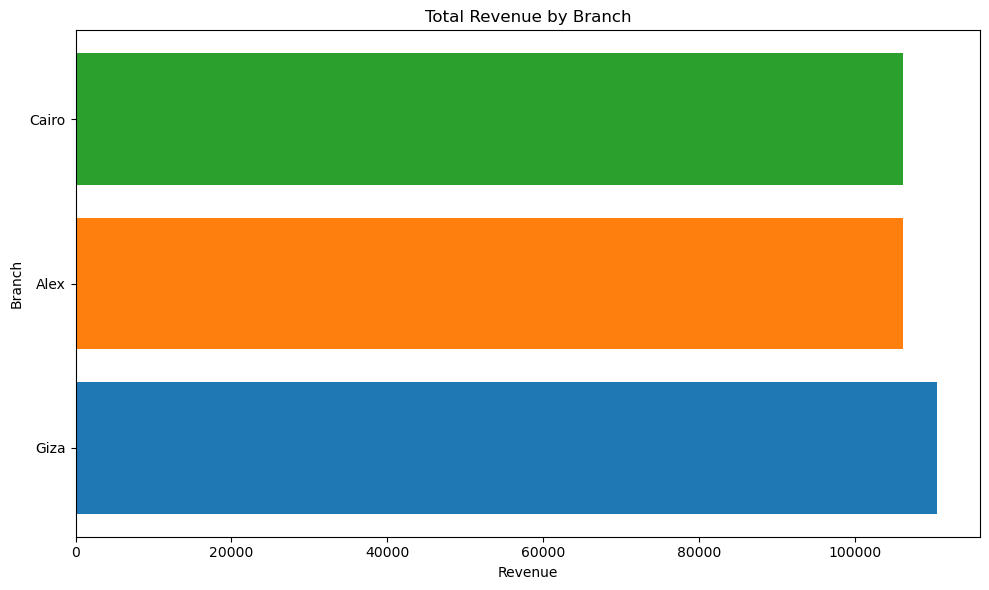

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(revenue_by_branch['Branch'], revenue_by_branch['Sales'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Total Revenue by Branch')
plt.xlabel('Revenue')
plt.ylabel('Branch')
plt.tight_layout()
plt.show()

# Analyze the popularity of product categories depending on location to see which products are most frequently purchased in different cities.

In [13]:
category_popularity_by_location = data.groupby(['City', 'Product line'])['Sales'].sum().reset_index()
category_popularity_by_location = category_popularity_by_location.sort_values(by=['City', 'Sales'], ascending=False)

print("\nCategory Popularity by Location:")
print(category_popularity_by_location)


Category Popularity by Location:
         City            Product line       Sales
16     Yangon      Home and lifestyle  22417.1955
17     Yangon       Sports and travel  19372.6995
12     Yangon  Electronic accessories  18317.1135
14     Yangon      Food and beverages  17163.1005
13     Yangon     Fashion accessories  16332.5085
15     Yangon       Health and beauty  12597.7530
8   Naypyitaw      Food and beverages  23766.8550
7   Naypyitaw     Fashion accessories  21560.0700
6   Naypyitaw  Electronic accessories  18968.9745
9   Naypyitaw       Health and beauty  16615.3260
11  Naypyitaw       Sports and travel  15761.9280
10  Naypyitaw      Home and lifestyle  13895.5530
5    Mandalay       Sports and travel  19988.1990
3    Mandalay       Health and beauty  19980.6600
4    Mandalay      Home and lifestyle  17549.1645
0    Mandalay  Electronic accessories  17051.4435
1    Mandalay     Fashion accessories  16413.3165
2    Mandalay      Food and beverages  15214.8885


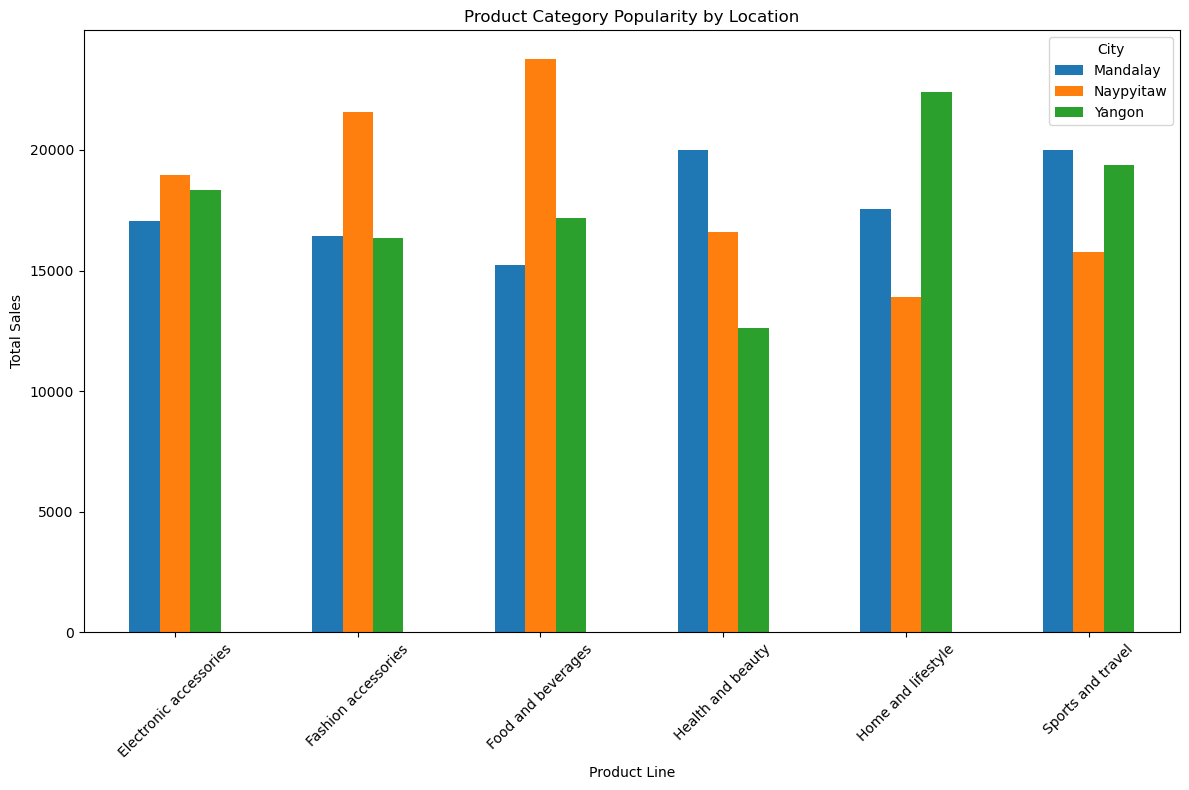

In [14]:
pivot_data = category_popularity_by_location.pivot(index='Product line', columns='City', values='Sales')

pivot_data.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Product Category Popularity by Location')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()

# Task 2 


# Calculating the average spend per transaction for members and regular customers to compare their spend.

In [15]:
avg_spend_per_customer_type = data.groupby('Customer type')['Sales'].mean().reset_index()
print("Average Spend per Customer Type:")
print(avg_spend_per_customer_type)

Average Spend per Customer Type:
  Customer type       Sales
0        Member  335.742945
1        Normal  306.372379


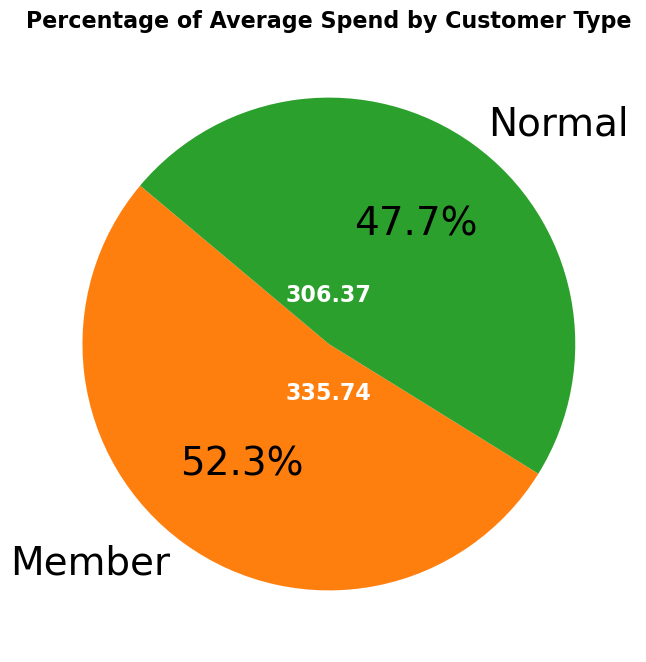

In [57]:
labels = avg_spend_per_customer_type['Customer type']
sizes = avg_spend_per_customer_type['Sales']
colors = ['#ff7f0e', '#2ca02c']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 28})
plt.title('Percentage of Average Spend by Customer Type', fontsize=16, fontweight='bold')

for i, (label, size) in enumerate(zip(labels, sizes)):
    value_text = f"{size:.2f}"
    angle = 140 + (360 * sum(sizes[:i]) / sum(sizes)) 
    plt.text(0, -0.2 + (i * 0.4), value_text, ha='center', va='center', color='white', fontsize=16, fontweight='bold')

plt.show()


# Analysis of payment method preferences for members and regular customers to understand whether these groups prefer different payment methods.

In [17]:
payment_preferences = data.groupby(['Customer type', 'Payment']).size().reset_index(name='Count')

print("\nPayment Preferences by Customer Type:")
print(payment_preferences)



Payment Preferences by Customer Type:
  Customer type      Payment  Count
0        Member         Cash    192
1        Member  Credit card    187
2        Member      Ewallet    186
3        Normal         Cash    152
4        Normal  Credit card    124
5        Normal      Ewallet    159


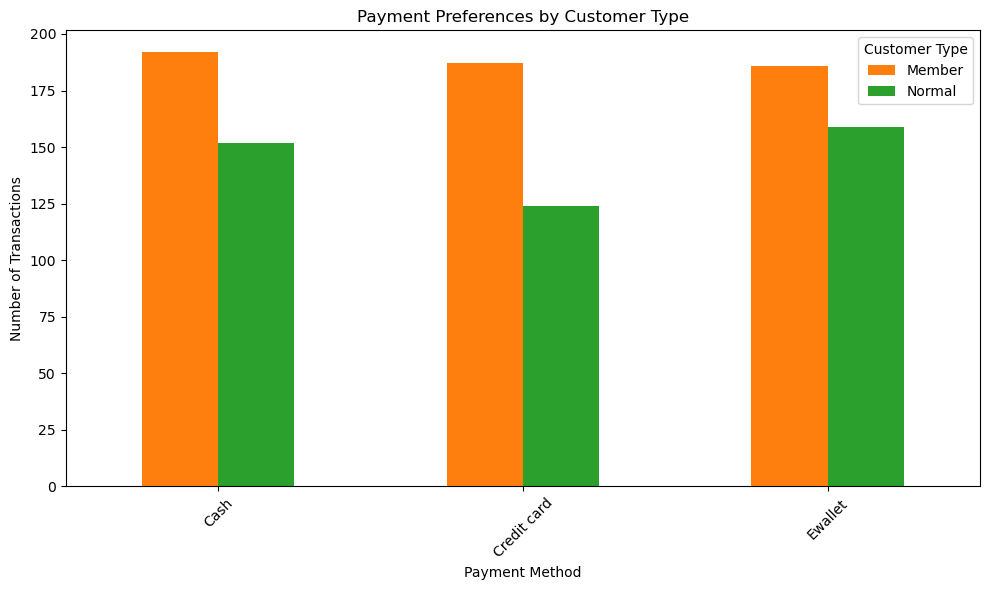

In [18]:
pivot_data = payment_preferences.pivot(index='Payment', columns='Customer type', values='Count')

pivot_data.plot(kind='bar', figsize=(10, 6), color=['#ff7f0e', '#2ca02c'])
plt.title('Payment Preferences by Customer Type')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


# Task 3 

# Analyze the popularity of product categories by gender to see which products are more popular among women and which among men.

In [19]:
category_popularity_by_gender = data.groupby(['Gender', 'Product line'])['Sales'].sum().unstack()
print(category_popularity_by_gender)

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Gender                                                                          
Female                    31226.7060            33919.641          36465.7965   
Male                      23110.8255            20386.254          19679.0475   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Gender                                                                  
Female               23418.7275           33720.582         35920.3845  
Male                 25775.0115           20141.331         19202.4420  


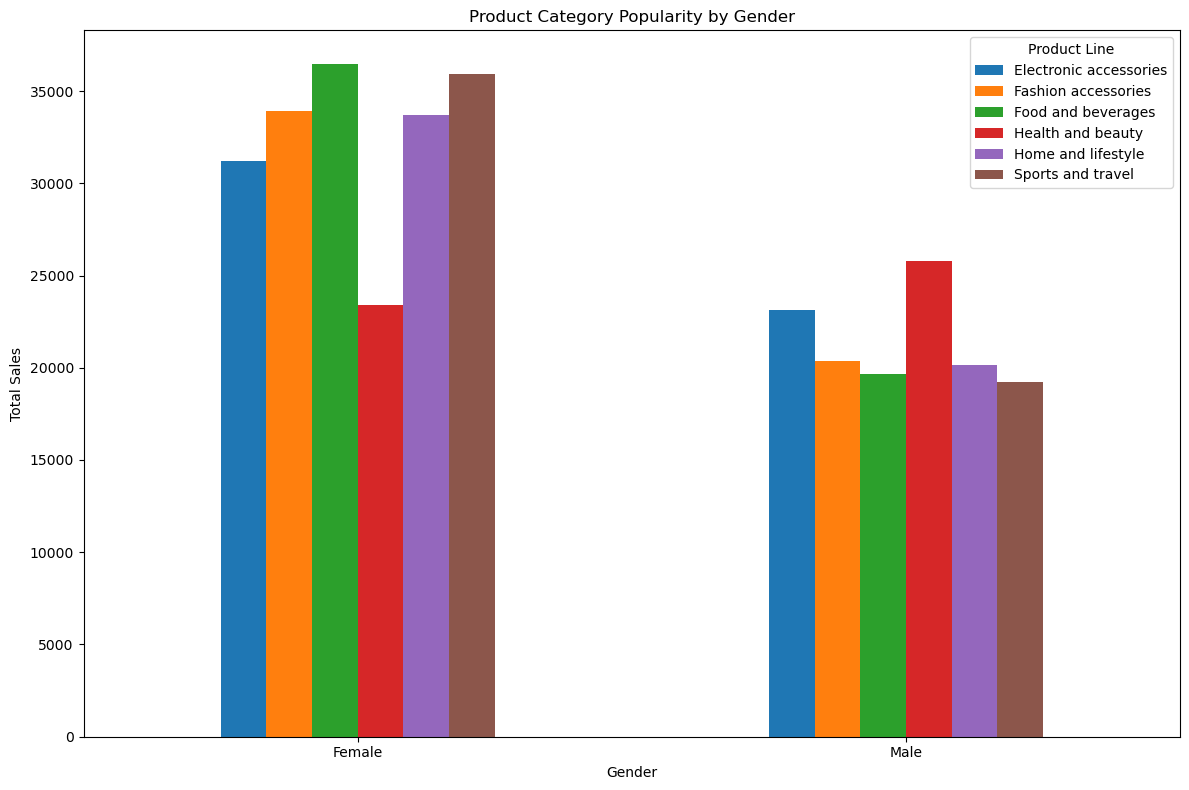

In [20]:
category_popularity_by_gender.plot(kind='bar', figsize=(12, 8))
plt.title('Product Category Popularity by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()

# Compare the value of the average basket for women and men to see which group spends more on transactions.

In [21]:
average_basket_value_by_gender = data.groupby('Gender')['Sales'].mean()
print(average_basket_value_by_gender)

Gender
Female    340.931414
Male      299.055738
Name: Sales, dtype: float64


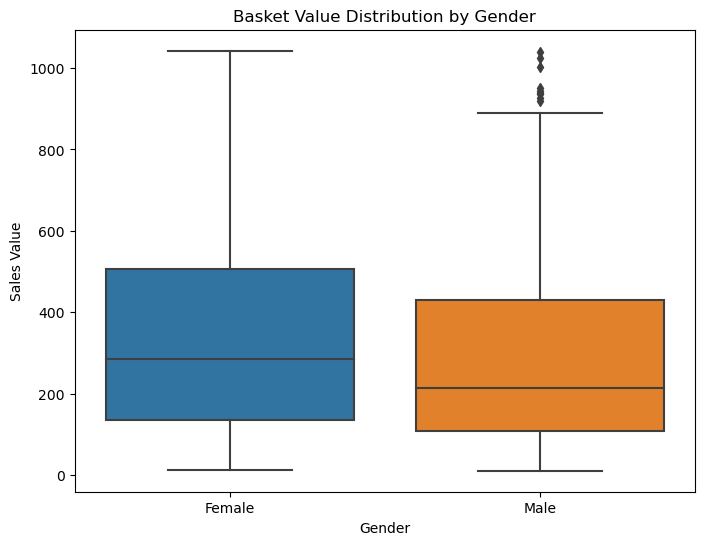

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Sales', data=data, palette=['#1f77b4', '#ff7f0e'])
plt.title('Basket Value Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Sales Value')
plt.show()


# Task 4 

# Calculating sales for each hour of the day to identify peak hours when sales are highest.

In [23]:
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour

print(data[['Time', 'Hour']].head())
peak_sales_hours = data.groupby('Hour')['Sales'].sum().reset_index()
print("\nPeak Sales Hours DataFrame:")
print(peak_sales_hours)

          Time  Hour
0   1:08:00 PM    13
1  10:29:00 AM    10
2   1:23:00 PM    13
3   8:33:00 PM    20
4  10:37:00 AM    10

Peak Sales Hours DataFrame:
    Hour       Sales
0     10  31421.4810
1     11  30377.3295
2     12  26065.8825
3     13  34723.2270
4     14  30828.3990
5     15  31179.5085
6     16  25226.3235
7     17  24445.2180
8     18  26030.3400
9     19  39699.5130
10    20  22969.5270


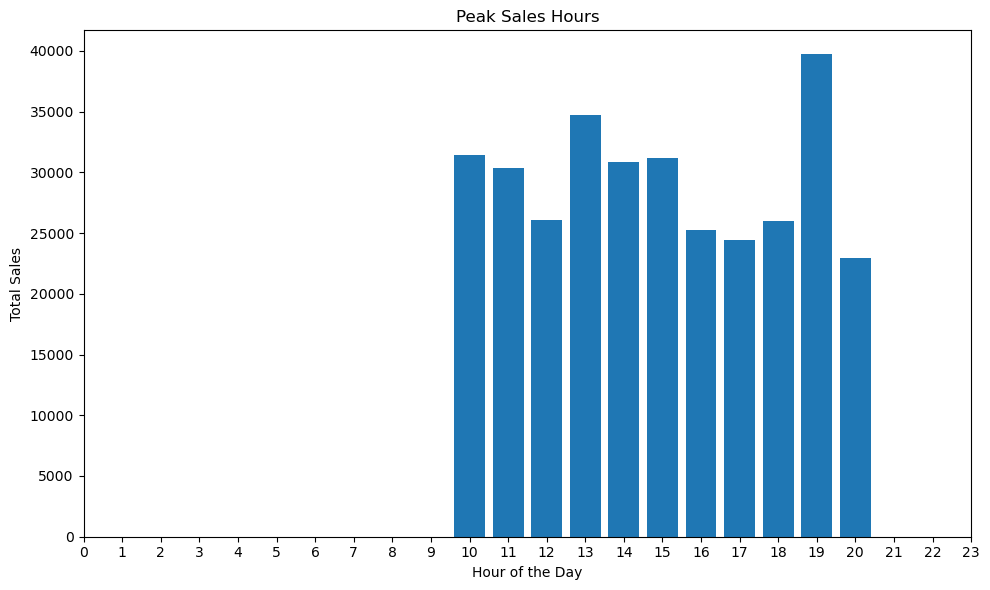

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(peak_sales_hours['Hour'], peak_sales_hours['Sales'], color='#1f77b4')
plt.title('Peak Sales Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))  
plt.tight_layout()
plt.show()

# Analyze the impact of hours on sales across product categories to understand whether specific hours have a greater impact on sales of specific products.

In [25]:
sales_volume_by_hour = data.groupby('Hour')['Invoice ID'].count().reset_index()
sales_volume_by_hour.columns = ['Hour', 'Sales Volume']
print("\nSales Volume by Hour DataFrame:")
print(sales_volume_by_hour)


Sales Volume by Hour DataFrame:
    Hour  Sales Volume
0     10           101
1     11            90
2     12            89
3     13           103
4     14            83
5     15           102
6     16            77
7     17            74
8     18            93
9     19           113
10    20            75


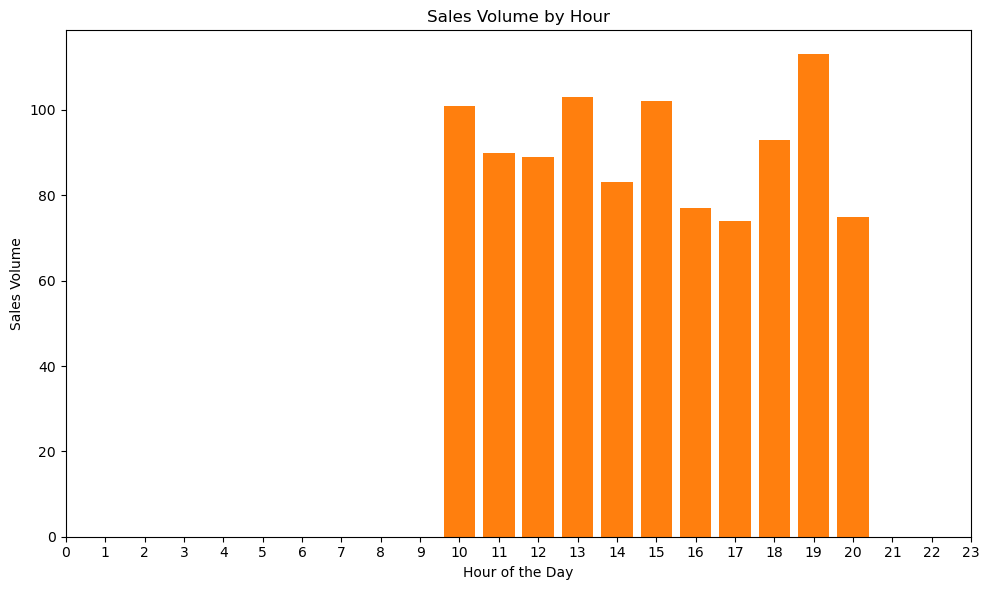

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(sales_volume_by_hour['Hour'], sales_volume_by_hour['Sales Volume'], color='#ff7f0e')
plt.title('Sales Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Volume')
plt.xticks(range(0, 24))  
plt.tight_layout()
plt.show()

# Group sales by hours and product categories to identify which products sell best at different times of the day.

In [27]:
sales_by_hour_and_category = data.groupby(['Hour', 'Product line'])['Sales'].sum().unstack()
print("\nSales by Hour and Category DataFrame:")
print(sales_by_hour_and_category)


Sales by Hour and Category DataFrame:
Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Hour                                                                            
10                         4217.7660            6102.6420           4843.8390   
11                         5950.1820            4368.5040           6416.7075   
12                         3443.0445            4950.9810           4310.9010   
13                         3877.1250            8109.3915           3747.8490   
14                         5693.5725            4745.1705           4263.2625   
15                         5756.6040            3456.6630           7418.1975   
16                         3466.2705            5545.3965           4562.5860   
17                         4111.9155            4118.3205           1421.3430   
18                         6447.1785            4461.9855           4198.5405   
19                         5777.1525            6137.1555           79

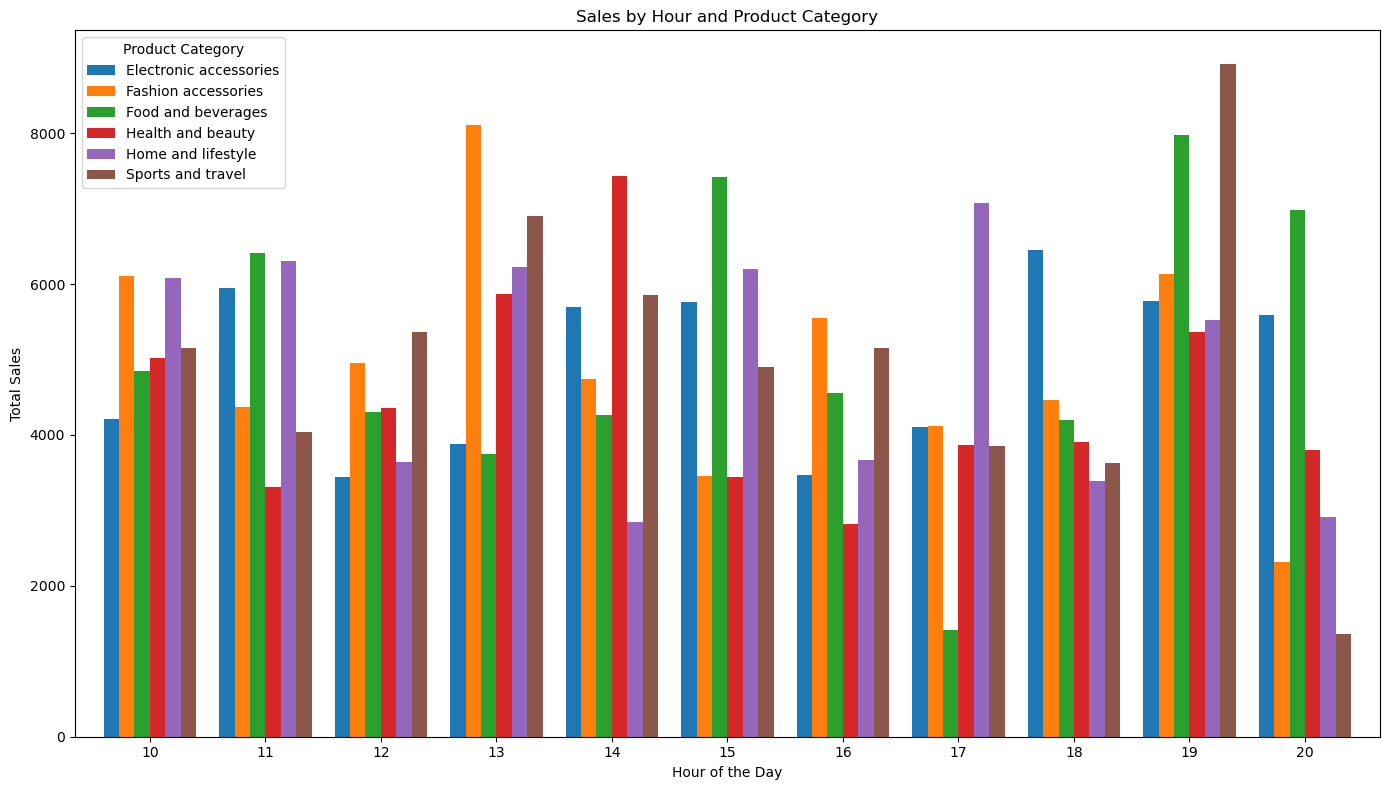

In [28]:
sales_by_hour_and_category.plot(kind='bar', figsize=(14, 8), stacked=False, width=0.8)
plt.title('Sales by Hour and Product Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


# Task 5 

# Calculate profit margin as the ratio of gross profit to costs to see which products have the highest margins.

In [29]:
data['Profit Margin'] = data['gross income'] / data['cogs']

profit_margin_by_product = data.groupby('Product line')['Profit Margin'].mean().reset_index()
profit_margin_by_product = profit_margin_by_product.sort_values(by='Profit Margin', ascending=False)

print("Profit Margin by Product Line DataFrame:")
print(profit_margin_by_product)


Profit Margin by Product Line DataFrame:
             Product line  Profit Margin
0  Electronic accessories           0.05
1     Fashion accessories           0.05
4      Home and lifestyle           0.05
5       Sports and travel           0.05
2      Food and beverages           0.05
3       Health and beauty           0.05


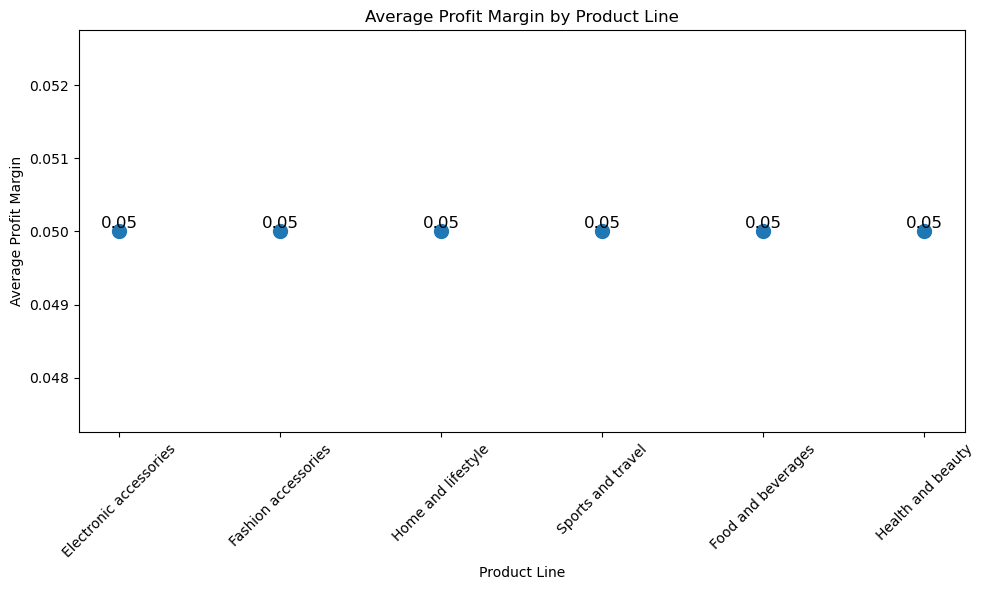

In [30]:
labels = profit_margin_by_product['Product line']
values = profit_margin_by_product['Profit Margin']

plt.figure(figsize=(10, 6))
plt.plot(labels, values, 'o', color='#1f77b4', markersize=10)
plt.title('Average Profit Margin by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Add up sales and gross profits for each product category to see which product categories are most profitable.

In [31]:
profitability_by_category = data.groupby('Product line').agg({
    'Sales': 'sum',
    'gross income': 'sum'
}).reset_index()


profitability_by_category['Profitability Ratio'] = profitability_by_category['gross income'] / profitability_by_category['Sales']


print("\nProfitability by Product Line DataFrame:")
print(profitability_by_category)



Profitability by Product Line DataFrame:
             Product line       Sales  gross income  Profitability Ratio
0  Electronic accessories  54337.5315     2587.5015             0.047619
1     Fashion accessories  54305.8950     2585.9950             0.047619
2      Food and beverages  56144.8440     2673.5640             0.047619
3       Health and beauty  49193.7390     2342.5590             0.047619
4      Home and lifestyle  53861.9130     2564.8530             0.047619
5       Sports and travel  55122.8265     2624.8965             0.047619


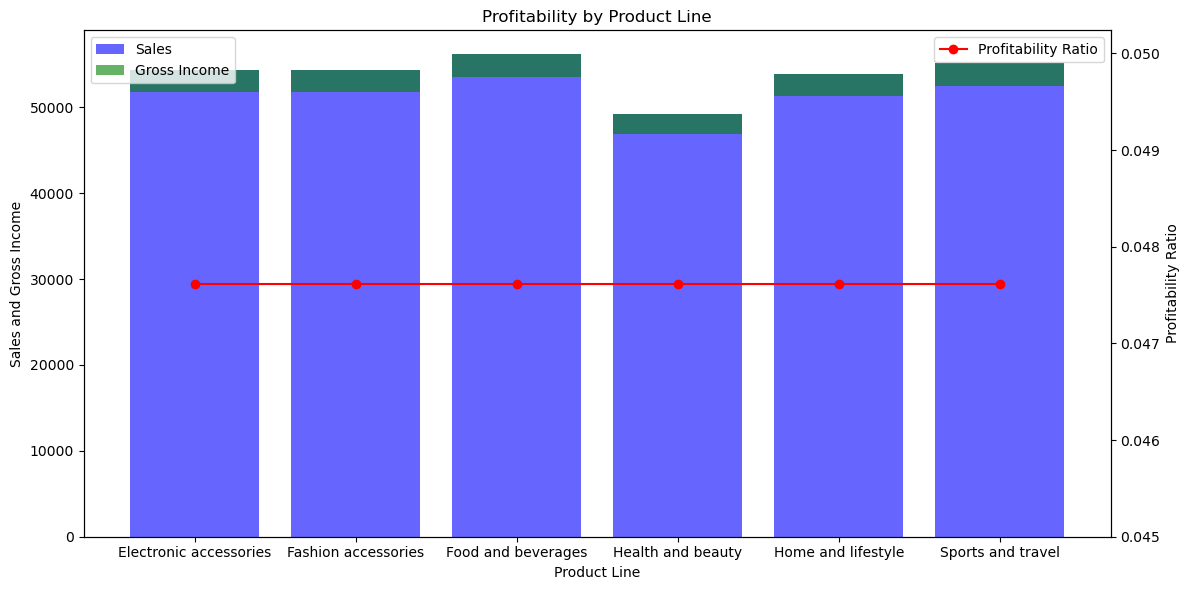

In [32]:
product_lines = profitability_by_category['Product line']
sales = profitability_by_category['Sales']
gross_income = profitability_by_category['gross income']
profitability_ratio = profitability_by_category['Profitability Ratio']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(product_lines, sales, label='Sales', alpha=0.6, color='blue')
ax1.bar(product_lines, gross_income, label='Gross Income', alpha=0.6, color='green', bottom=sales-gross_income)
ax1.set_ylabel("Sales and Gross Income")
ax1.set_xlabel("Product Line")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(product_lines, profitability_ratio, color='red', marker='o', label='Profitability Ratio')
ax2.set_ylabel("Profitability Ratio")
ax2.legend(loc="upper right")

plt.xticks(rotation=45, ha='right')

plt.title("Profitability by Product Line")
plt.tight_layout()
plt.show()


# Task 6

# Count transactions for each payment method to analyze which method is most frequently chosen by customers.

In [33]:
payment_by_location = data.groupby(['City', 'Payment']).size().unstack(fill_value=0).reset_index()

payment_by_gender = data.groupby(['Gender', 'Payment']).size().unstack(fill_value=0).reset_index()

payment_by_customer_type = data.groupby(['Customer type', 'Payment']).size().unstack(fill_value=0).reset_index()

print("Payment Preferences by Location DataFrame:")
print(payment_by_location)

print("\nPayment Preferences by Gender DataFrame:")
print(payment_by_gender)

print("\nPayment Preferences by Customer Type DataFrame:")
print(payment_by_customer_type)


Payment Preferences by Location DataFrame:
Payment       City  Cash  Credit card  Ewallet
0         Mandalay   110          109      113
1        Naypyitaw   124           98      106
2           Yangon   110          104      126

Payment Preferences by Gender DataFrame:
Payment  Gender  Cash  Credit card  Ewallet
0        Female   205          183      183
1          Male   139          128      162

Payment Preferences by Customer Type DataFrame:
Payment Customer type  Cash  Credit card  Ewallet
0              Member   192          187      186
1              Normal   152          124      159


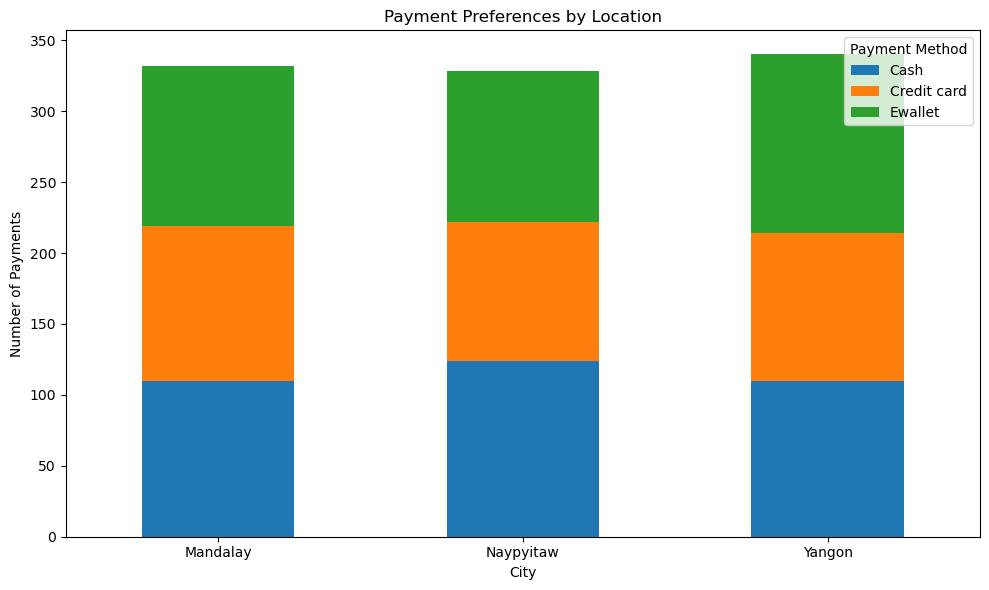

In [34]:
payment_by_location.set_index('City').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Payment Preferences by Location')
plt.xlabel('City')
plt.ylabel('Number of Payments')
plt.legend(title='Payment Method')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


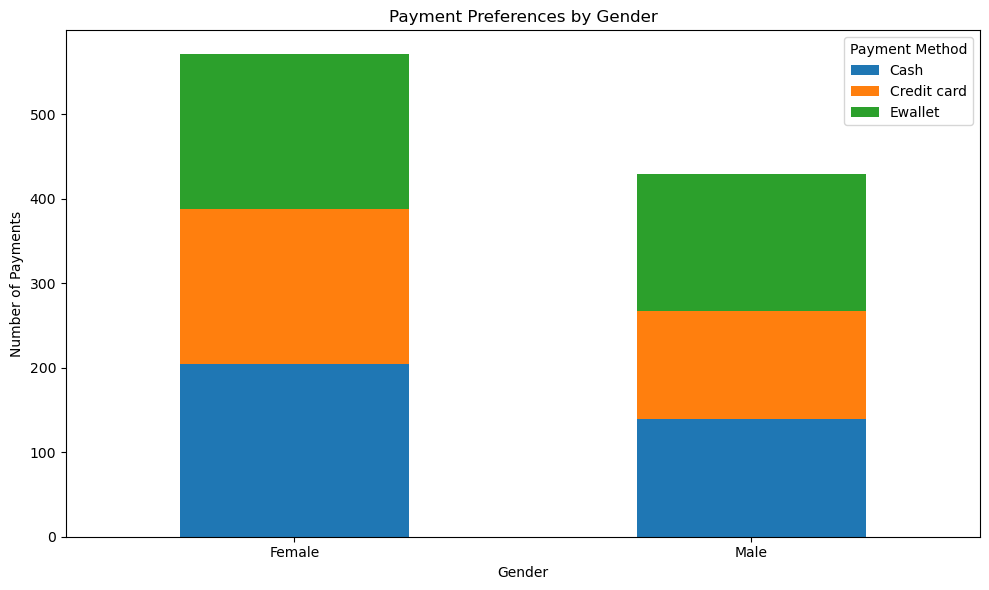

In [35]:
payment_by_gender.set_index('Gender').plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], figsize=(10, 6))
plt.title('Payment Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Payments')
plt.legend(title='Payment Method')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


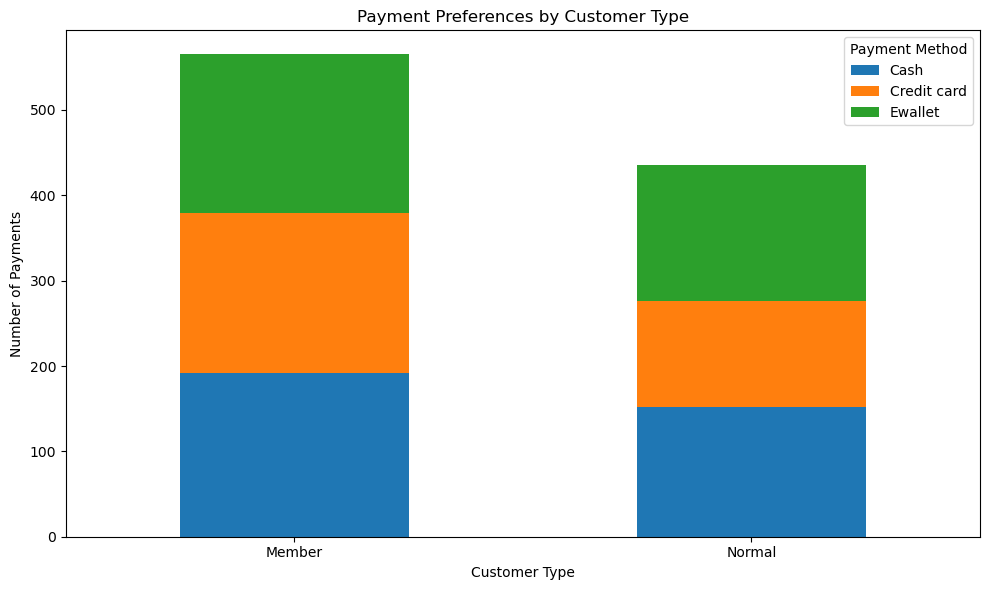

In [36]:
payment_by_customer_type.set_index('Customer type').plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], figsize=(10, 6))
plt.title('Payment Preferences by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Payments')
plt.legend(title='Payment Method')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Calculate the average transaction value for each payment method to see if the payment method affects the transaction value.

In [37]:
transaction_value_by_payment = data.groupby('Payment')['Sales'].mean().reset_index()
transaction_value_by_payment.columns = ['Payment', 'Average Transaction Value']

print("\nTransaction Value by Payment Method DataFrame:")
print(transaction_value_by_payment)



Transaction Value by Payment Method DataFrame:
       Payment  Average Transaction Value
0         Cash                 326.181890
1  Credit card                 324.009878
2      Ewallet                 318.820600


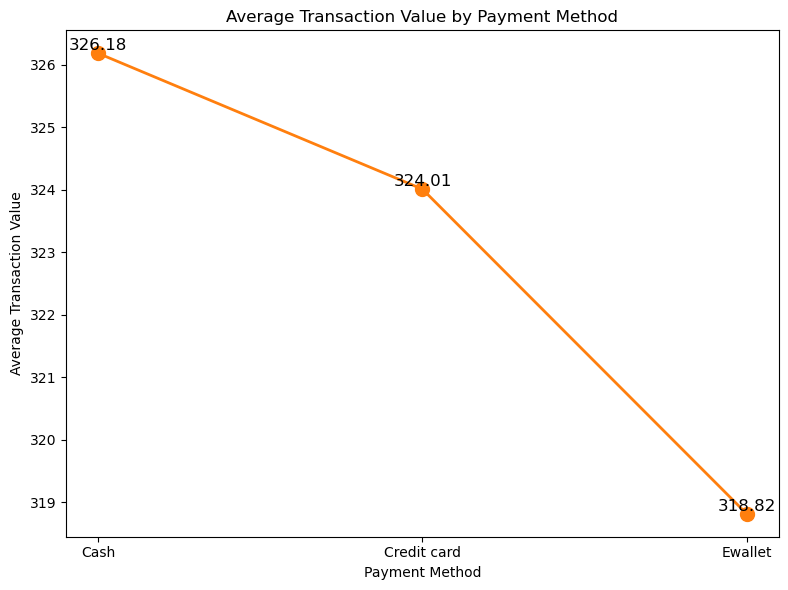

In [38]:
labels = transaction_value_by_payment['Payment']
values = transaction_value_by_payment['Average Transaction Value']

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', color='#ff7f0e', linestyle='-', linewidth=2, markersize=10)
plt.title('Average Transaction Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Transaction Value')

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Task 7

# Group customer ratings by purchase value to see if higher purchase values ​​influence ratings.

In [39]:
data['Sales Range'] = pd.cut(data['Sales'], bins=[0, 100, 300, 1000], labels=['Low', 'Medium', 'High'])

rating_by_sales_value = data.groupby('Sales Range', observed=False)['Rating'].mean().reset_index()

print("Rating by Sales Value Range DataFrame:")
print(rating_by_sales_value)


Rating by Sales Value Range DataFrame:
  Sales Range    Rating
0         Low  6.798077
1      Medium  7.146537
2        High  6.926540


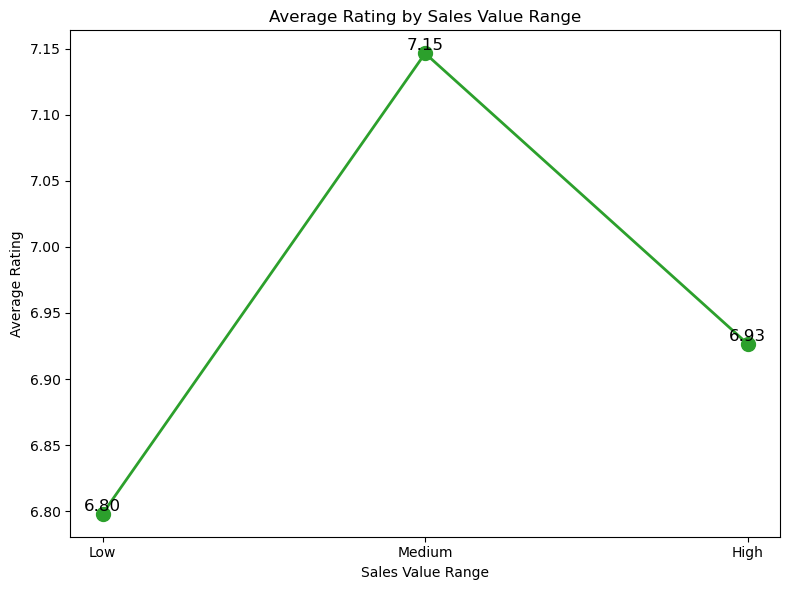

In [40]:
labels = rating_by_sales_value['Sales Range']
values = rating_by_sales_value['Rating']

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', color='#2ca02c', linestyle='-', linewidth=2, markersize=10)
plt.title('Average Rating by Sales Value Range')
plt.xlabel('Sales Value Range')
plt.ylabel('Average Rating')

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Analyze customer ratings by payment method to see if payment method affects customer satisfaction.

In [41]:
rating_by_product = data.groupby('Product line', observed=False)['Rating'].mean().reset_index()

print("\nRating by Product Line DataFrame:")
print(rating_by_product)



Rating by Product Line DataFrame:
             Product line    Rating
0  Electronic accessories  6.924706
1     Fashion accessories  7.029213
2      Food and beverages  7.113218
3       Health and beauty  7.003289
4      Home and lifestyle  6.837500
5       Sports and travel  6.916265


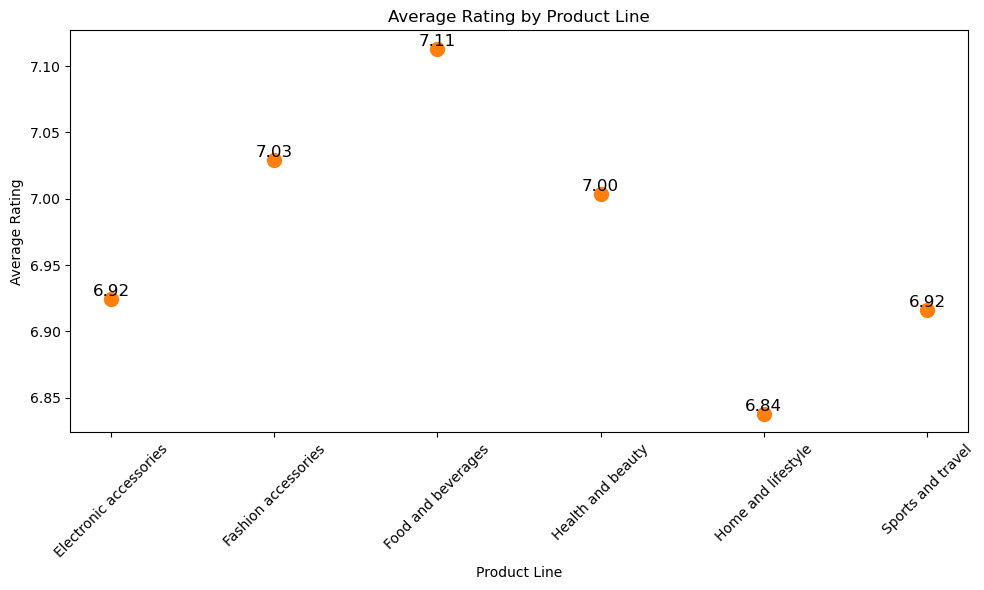

In [42]:
labels = rating_by_product['Product line']
values = rating_by_product['Rating']

plt.figure(figsize=(10, 6))
plt.plot(labels, values, 'o', color='#ff7f0e', markersize=10)
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [43]:
rating_by_location = data.groupby('City', observed=False)['Rating'].mean().reset_index()

print("\nRating by Location DataFrame:")
print(rating_by_location)



Rating by Location DataFrame:
        City    Rating
0   Mandalay  6.818072
1  Naypyitaw  7.072866
2     Yangon  7.027059


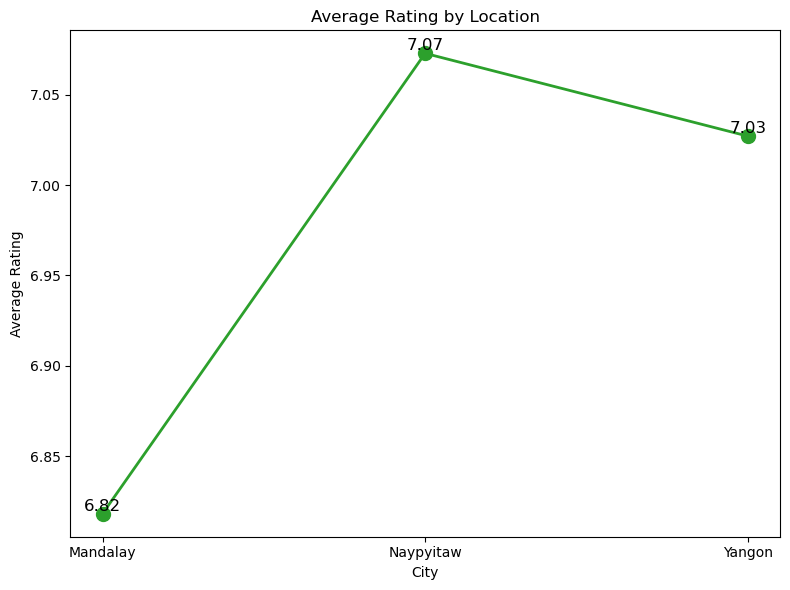

In [44]:
labels = rating_by_location['City']
values = rating_by_location['Rating']

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', color='#2ca02c', linestyle='-', linewidth=2, markersize=10)
plt.title('Average Rating by Location')
plt.xlabel('City')
plt.ylabel('Average Rating')

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [45]:
rating_by_payment_method = data.groupby('Payment', observed=False)['Rating'].mean().reset_index()

print("\nRating by Payment Method DataFrame:")
print(rating_by_payment_method)



Rating by Payment Method DataFrame:
       Payment    Rating
0         Cash  6.970058
1  Credit card  7.003215
2      Ewallet  6.947826


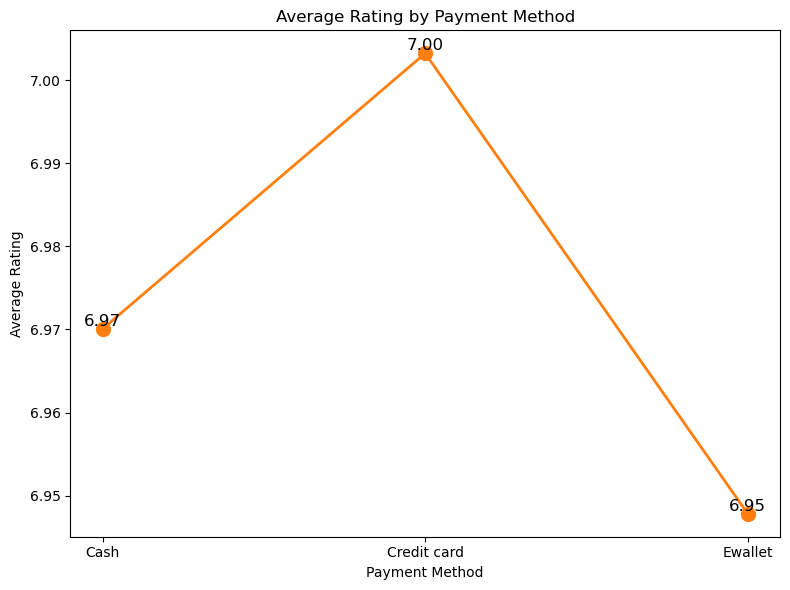

In [46]:
labels = rating_by_payment_method['Payment']
values = rating_by_payment_method['Rating']

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', color='#ff7f0e', linestyle='-', linewidth=2, markersize=10)
plt.title('Average Rating by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Rating')

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Task 8

# Segment sales by customer type and gender to identify customer segments that may respond better to personalization.

In [47]:
data['Sales Range'] = pd.cut(data['Sales'], bins=[0, 100, 300, 1000], labels=['Low', 'Medium', 'High'])

rating_by_sales_value = data.groupby('Sales Range', observed=False)['Rating'].mean().reset_index()

print("Rating by Sales Value Range DataFrame:")
print(rating_by_sales_value)


Rating by Sales Value Range DataFrame:
  Sales Range    Rating
0         Low  6.798077
1      Medium  7.146537
2        High  6.926540


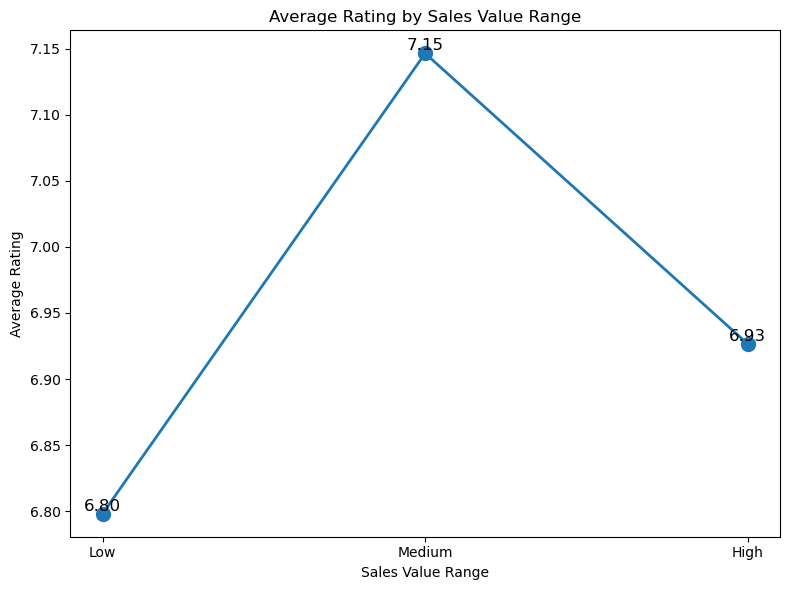

In [48]:
labels = rating_by_sales_value['Sales Range']
values = rating_by_sales_value['Rating']

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', color='#1f77b4', linestyle='-', linewidth=2, markersize=10)
plt.title('Average Rating by Sales Value Range')
plt.xlabel('Sales Value Range')
plt.ylabel('Average Rating')

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Analyzing the popularity of products in less popular categories to identify potential promotion opportunities.

In [49]:
rating_by_product = data.groupby('Product line', observed=False)['Rating'].mean().reset_index()

print("\nRating by Product Line DataFrame:")
print(rating_by_product)



Rating by Product Line DataFrame:
             Product line    Rating
0  Electronic accessories  6.924706
1     Fashion accessories  7.029213
2      Food and beverages  7.113218
3       Health and beauty  7.003289
4      Home and lifestyle  6.837500
5       Sports and travel  6.916265


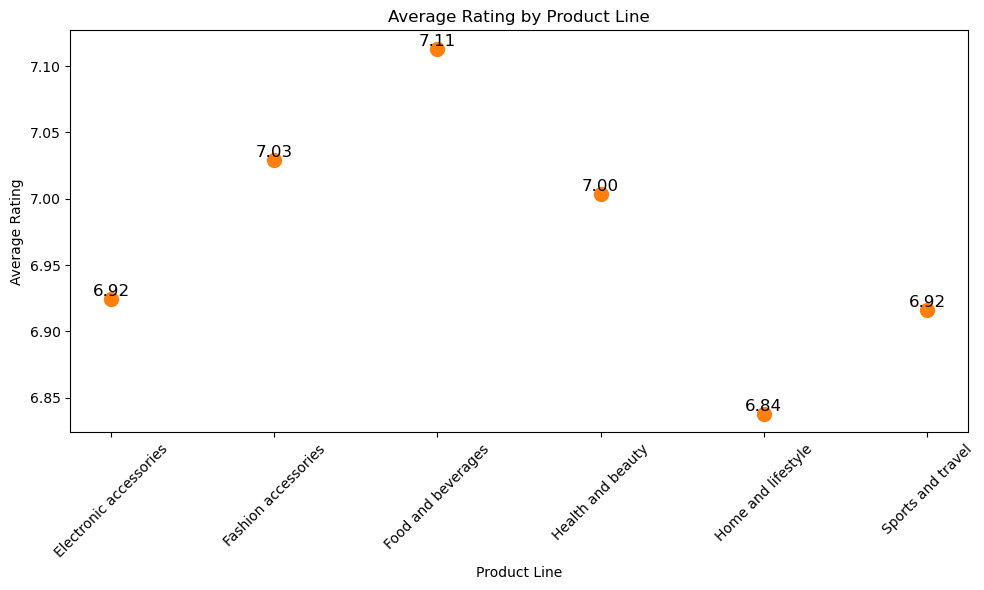

In [50]:
labels = rating_by_product['Product line']
values = rating_by_product['Rating']

plt.figure(figsize=(10, 6))
plt.plot(labels, values, 'o', color='#ff7f0e', markersize=10)
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Segment customer ratings by location to identify cities where customers are more satisfied with services.

In [51]:
rating_by_location = data.groupby('City', observed=False)['Rating'].mean().reset_index()

print("\nRating by Location DataFrame:")
print(rating_by_location)



Rating by Location DataFrame:
        City    Rating
0   Mandalay  6.818072
1  Naypyitaw  7.072866
2     Yangon  7.027059


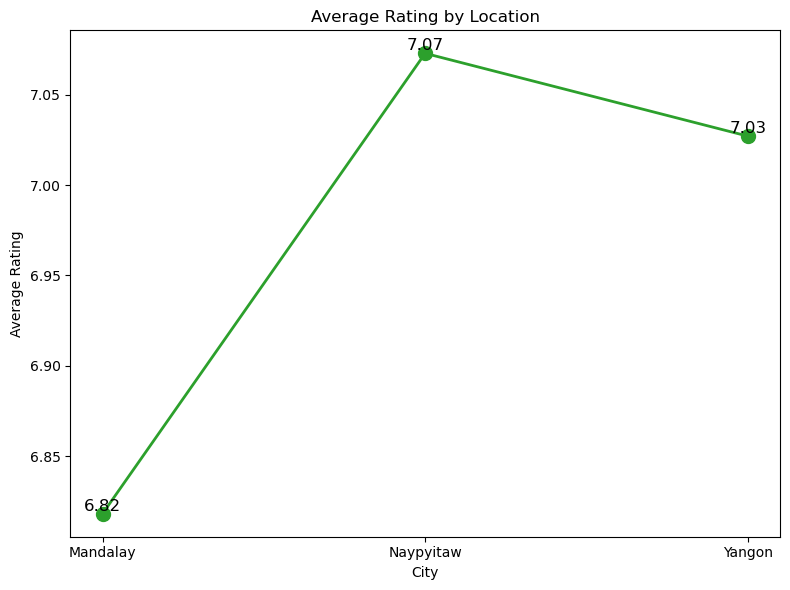

In [52]:
labels = rating_by_location['City']
values = rating_by_location['Rating']

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', color='#2ca02c', linestyle='-', linewidth=2, markersize=10)
plt.title('Average Rating by Location')
plt.xlabel('City')
plt.ylabel('Average Rating')

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Analyze average customer ratings by payment method to determine which payment methods are preferred by more satisfied customers.

In [53]:
rating_by_payment_method = data.groupby('Payment', observed=False)['Rating'].mean().reset_index()

print("\nRating by Payment Method DataFrame:")
print(rating_by_payment_method)



Rating by Payment Method DataFrame:
       Payment    Rating
0         Cash  6.970058
1  Credit card  7.003215
2      Ewallet  6.947826


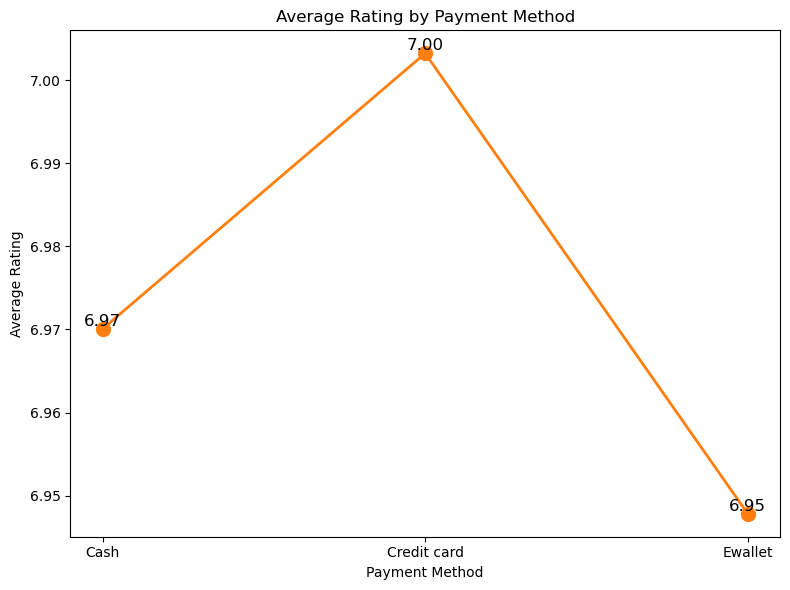

In [54]:
labels = rating_by_payment_method['Payment']
values = rating_by_payment_method['Rating']

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', color='#ff7f0e', linestyle='-', linewidth=2, markersize=10)
plt.title('Average Rating by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Rating')

for i, value in enumerate(values):
    plt.text(labels[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Summary

Optimizing Product Placement and Promotions by Location: Certain branches outperform others in revenue generation, with varied preferences for product categories across locations. Recommendation: Tailor product placement, stock levels, and promotional campaigns to the preferences of each location. For example, high-performing branches could support premium product lines, while branches with lower sales volumes may benefit from promotional bundles or discounts to drive foot traffic.

Enhancing Loyalty Programs for Members: Analysis shows that members spend more per transaction compared to regular customers, indicating a potential for further engagement through loyalty incentives. Recommendation: Offer exclusive member benefits, such as targeted discounts or early access to sales events, to encourage more frequent and higher-value purchases. Furthermore, by analyzing payment preferences of members, the supermarket could offer loyalty points or rewards for preferred payment methods.

Targeted Marketing by Gender Preferences: Gender differences in product category preferences provide an opportunity for more personalized marketing efforts. Recommendation: Develop gender-targeted promotions, such as personalized email campaigns or in-store displays, to appeal to male and female customers based on their specific purchasing habits. This can increase the likelihood of converting interest into sales.

Adjusting Staffing and Inventory Based on Peak Hours: Sales volume is concentrated in specific hours, with different products showing peaks at varying times. Recommendation: Optimize staffing and inventory levels around peak sales hours to meet demand efficiently. For example, ensuring that high-demand products are well-stocked during peak times will minimize missed sales opportunities, while aligning staffing levels can improve customer service.

Focusing Marketing on High-Margin Products: Certain product categories yield higher profit margins, making them more valuable for revenue generation. Recommendation: Allocate more promotional resources to high-margin products to increase their visibility and drive higher sales. Strategic upselling or bundling these products can also maximize profitability.

Improving Checkout Experience and Promoting Preferred Payment Methods: Payment methods analysis shows customer satisfaction varies slightly with payment choice. Recommendation: Streamline the checkout process for the most-used payment methods to enhance customer satisfaction. Consider incentivizing the use of preferred payment options (e.g., cash or credit) with small discounts or rewards, which can improve customer experience and potentially reduce transaction fees for the business.

Leveraging Positive Customer Ratings for Service Improvements: Ratings analysis reveals that factors like purchase value, product type, and payment method influence customer satisfaction. Recommendation: Focus on enhancing the shopping experience around high-rated product lines and payment methods. For lower-rated areas, such as specific locations or product types, consider training staff or improving quality to elevate customer satisfaction.

Personalizing Offers for Specific Customer Segments: Segmenting customers by factors such as membership status and gender uncovers clear opportunities for personalized marketing. Recommendation: Create segment-specific promotions to engage targeted audiences effectively. For instance, less popular product categories could be promoted to customer segments that show interest in related products. This approach can drive sales in underperforming areas while enhancing customer loyalty.

# Strategic Application

By integrating these insights, the supermarket can make data-informed decisions to enhance profitability and customer engagement. Focused promotions, tailored loyalty programs, optimized staffing, and personalized offers will allow the supermarket to deliver a superior shopping experience while aligning operations with customer preferences. Implementing these strategies can help the supermarket meet customer needs more effectively, increase revenue from high-potential segments, and ultimately build stronger, more profitable customer relationships.

